<a href="https://colab.research.google.com/github/INmais/Energy_Services_2022/blob/main/Energy_Services_2022_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterig

## Step 1: Import Libraries 

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Step 2: Import Data 

In [29]:
DATA_FILEPATH_temp = 'https://raw.githubusercontent.com/INmais/Energy_Services_2022/main/Data/temperature.csv' 
raw_data_temp = pd.read_csv(DATA_FILEPATH_temp)
raw_data_temp['Date'] = pd.to_datetime(raw_data_temp['Date'], format='%d/%m/%Y %H:%M')
raw_data_temp.tail(10)

,Date,celsius
658,2019-03-11 04:00:00,18.733333
659,2019-03-11 05:00:00,18.663333
660,2019-03-11 06:00:00,18.585833
661,2019-03-11 07:00:00,18.584167
662,2019-03-11 08:00:00,19.222500
663,2019-03-11 09:00:00,22.584167
664,2019-03-11 10:00:00,23.836667
665,2019-03-11 11:00:00,24.785000
666,2019-03-11 12:00:00,23.811667
667,2019-03-11 13:00:00,22.831429


In [30]:
DATA_FILEPATH_wifi = 'https://raw.githubusercontent.com/INmais/Energy_Services_2022/main/Data/wifi.csv' 
raw_data_wifi = pd.read_csv(DATA_FILEPATH_wifi)
raw_data_wifi['Date'] = pd.to_datetime(raw_data_wifi['Date'], format='%d/%m/%Y %H:%M')
raw_data_wifi.tail(10)

,Date,eduroam,tecnico-guest
2678,2019-03-11 12:00:00,52.7,1.34
2679,2019-03-11 12:15:00,58.4,1.32
2680,2019-03-11 12:30:00,62.3,2.98
2681,2019-03-11 12:45:00,74.6,1.98
2682,2019-03-11 13:00:00,87.4,1.67
2683,NaT,NaN,NaN
2684,NaT,NaN,NaN
2685,NaT,NaN,NaN
2686,NaT,NaN,NaN
2687,NaT,NaN,NaN


In [31]:
DATA_FILEPATH_co2 = 'https://raw.githubusercontent.com/INmais/Energy_Services_2022/main/Data/co2.csv' 
raw_data_co2 = pd.read_csv(DATA_FILEPATH_co2)
raw_data_co2['Date'] = pd.to_datetime(raw_data_co2['Date'], format='%d/%m/%Y %H:%M')
raw_data_co2.tail(10)

,Date,ppm
658,2019-03-11 04:00:00,412.333333
659,2019-03-11 05:00:00,414.416667
660,2019-03-11 06:00:00,414.416667
661,2019-03-11 07:00:00,418.166667
662,2019-03-11 08:00:00,478.916667
663,2019-03-11 09:00:00,1939.000000
664,2019-03-11 10:00:00,1078.166667
665,2019-03-11 11:00:00,1229.166667
666,2019-03-11 12:00:00,498.750000
667,2019-03-11 13:00:00,482.571429


In [33]:
all_data=pd.merge(raw_data_co2, raw_data_temp,on='Date')
all_data=pd.merge(all_data, raw_data_wifi,on='Date')
all_data.head()

,Date,ppm,celsius,eduroam,tecnico-guest
0,2019-02-11 18:00:00,457.000000,17.548000,10.7,0.000
1,2019-02-11 19:00:00,450.583333,17.375000,1.0,0.000
2,2019-02-11 20:00:00,447.416667,17.193333,0.0,0.317
3,2019-02-11 21:00:00,443.583333,17.045833,0.0,0.000
4,2019-02-11 22:00:00,439.000000,16.935000,0.0,0.000


### 3.2 Merge Data

In [34]:
all_data['Date']=pd.to_datetime(all_data['Date'])
all_data.dtypes

Date              datetime64[ns]
ppm                      float64
celsius                  float64
eduroam                  float64
tecnico-guest            float64
dtype: object

In [35]:
all_data=all_data.rename(columns={'eduroam ':'eduroam'})

In [36]:
#clean data by filling NAN with previous values
all_data=all_data.fillna(method='ffill')

In [37]:
all_data

,Date,ppm,celsius,eduroam,tecnico-guest
0,2019-02-11 18:00:00,457.000000,17.548000,10.70,0.000
1,2019-02-11 19:00:00,450.583333,17.375000,1.00,0.000
2,2019-02-11 20:00:00,447.416667,17.193333,0.00,0.317
3,2019-02-11 21:00:00,443.583333,17.045833,0.00,0.000
4,2019-02-11 22:00:00,439.000000,16.935000,0.00,0.000
...,...,...,...,...,...
663,2019-03-11 09:00:00,1939.000000,22.584167,8.01,1.000
664,2019-03-11 10:00:00,1078.166667,23.836667,19.00,1.320
665,2019-03-11 11:00:00,1229.166667,24.785000,40.30,2.000
666,2019-03-11 12:00:00,498.750000,23.811667,52.70,1.340


# Clustering

The k-means problem is solved using either Lloyd’s or Elkan’s algorithm.

Lloyd: 

S. Lloyd, "Least squares quantization in PCM," in IEEE Transactions on Information Theory, vol. 28, no. 2, pp. 129-137, March 1982, doi: 10.1109/TIT.1982.1056489.

Elkan:
Elkan, C.P. (2003). Using the Triangle Inequality to Accelerate k-Means. ICML. (https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf)

In [39]:
# import KMeans
from sklearn.cluster import KMeans
from pandas import DataFrame

## temperature and ppm 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [12]:
# create kmeans object
kmeans = KMeans(n_clusters=3)
df = DataFrame(all_data,columns=['celsius','ppm'])
# fit kmeans object to data
kmeans.fit(df)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(df)
print(y_km)

[[  19.04116893  482.12705076]
 [  21.66554054 1268.52327328]
 [  23.42890476 2370.20952374]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 2 2 1 0 0 1 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 1 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 2 2 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 0 1 1 2 2 2 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 2 2 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2
 2 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 2 2 1 0 0 1 1 2 2 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0

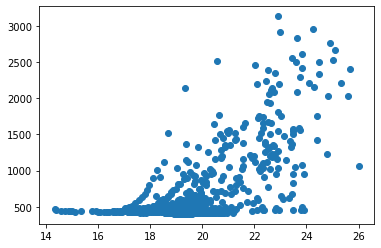

In [13]:
plt.scatter(df.celsius,df.ppm)

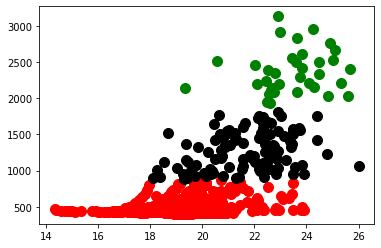

In [14]:
plt.scatter(df.celsius[y_km ==0], df.ppm[y_km == 0], s=100, c='red')
plt.scatter(df.celsius[y_km ==1], df.ppm[y_km == 1], s=100, c='black')
plt.scatter(df.celsius[y_km ==2], df.ppm[y_km == 2], s=100, c='green')

## temperature and wifi

In [15]:
# create kmeans object
kmeans2 = KMeans(n_clusters=3)
df2 = DataFrame(all_data,columns=['celsius','eduroam'])
# fit kmeans object to data
kmeans2.fit(df2)
# print location of clusters learned by kmeans object
print(kmeans2.cluster_centers_)
# save new clusters for chart
y_km2 = kmeans2.fit_predict(df2)
print(y_km2)

[[19.16351399  1.65607994]
 [22.64874373 75.16052632]
 [21.78522727 35.73636364]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1
 1 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 2 1 2 2 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 1 2 2
 2 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0

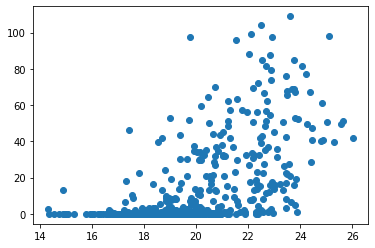

In [16]:
plt.scatter(df2.celsius,df2.eduroam)

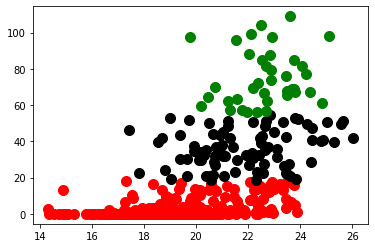

In [17]:
plt.scatter(df2.celsius[y_km2 ==0], df2.eduroam[y_km2 == 0], s=100, c='red')
plt.scatter(df2.celsius[y_km2 ==1], df2.eduroam[y_km2 == 1], s=100, c='black')
plt.scatter(df2.celsius[y_km2 ==2], df2.eduroam[y_km2 == 2], s=100, c='green')

# $CO_2$ and wifi

In [18]:
# create kmeans object
kmeans3 = KMeans(n_clusters=4)
df3 = DataFrame(all_data,columns=['ppm','eduroam'])
# fit kmeans object to data
kmeans3.fit(df3)
# print location of clusters learned by kmeans object
print(kmeans3.cluster_centers_)
# save new clusters for chart
y_km3 = kmeans3.fit_predict(df3)
print(y_km3)

[[ 463.9346561     2.67829539]
 [1483.02631577   40.62022807]
 [ 948.667298     17.41346429]
 [2370.20952374   51.50542857]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 2 2 0 0 0 0 0 0
 0 0 0 0 0 0 2 1 1 1 2 2 2 1 1 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 3 3 1 2 0 1 3 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 1 2 2 1 1 1 2 2 2 2 2
 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 1 3 3 3 1 2 0 0 0 0 2 2 0 0 0 0 0 0 1 1 0 0
 1 2 1 3 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 1 3 3 1 1 2 2 2 2 2 0 0 0 0 0 0 0 0 0 1 3 1 2 2 1 1 3 3 3 2 2 0 0 0 0 0 0
 0 0 0 0 0 1 3 3 1 1 1 1 1 1 1 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 3
 3 3 1 2 2 2 0 0 0 0 0 0 0 0 0 2 3 3 2 0 0 2 1 3 3

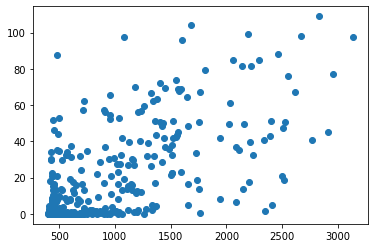

In [19]:
plt.scatter(df3.ppm,df3.eduroam)

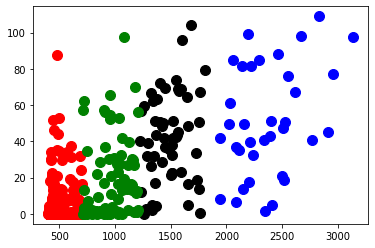

In [20]:
plt.scatter(df3.ppm[y_km3 ==0], df3.eduroam[y_km3 == 0], s=100, c='red')
plt.scatter(df3.ppm[y_km3 ==1], df3.eduroam[y_km3 == 1], s=100, c='black')
plt.scatter(df3.ppm[y_km3 ==2], df3.eduroam[y_km3 == 2], s=100, c='green')
plt.scatter(df3.ppm[y_km3 ==3], df3.eduroam[y_km3 == 3], s=100, c='blue')

# Clustering all features 

In [21]:
# create kmeans object
kmeans = KMeans(n_clusters=4)
df4 = DataFrame(all_data,columns=['celsius','ppm','eduroam'])
# fit kmeans object to data
kmeans.fit(df4)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km4 = kmeans.fit_predict(df4)
print(y_km4)
y_km4.dtype

[[  18.97151767  464.42650602    2.70592562]
 [  22.09349415 1483.02631577   40.62022807]
 [  20.86840727  951.58598031   17.42687952]
 [  23.42890476 2370.20952374   51.50542857]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 1 3 3 3 0 0 0 0 0 0
 0 0 0 0 0 0 3 1 1 1 3 3 3 1 1 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 2 2 1 3 0 1 2 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 3 3 1 1 1 3 3 3 3 3
 0 0 0 0 0 0 0 0 0 0 0 3 1 1 3 1 2 2 2 1 3 0 0 0 0 3 3 0 0 0 0 0 0 1 1 3 0
 1 3 1 2 1 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0
 1 2 1 1 1 3 3 3 3 3 0 0 0 0 0 0 0 0 0 1 2 1 3 3 1 1 2 2 2 3 3 0 0 0 0 0 0
 0 0 0 0 0 1 2 2 1 1 1 1 1 1 1 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 

dtype('int32')

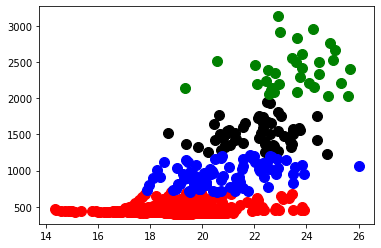

In [46]:
fig1 = plt.figure()

plt.scatter(df4.celsius[y_km4 ==0], df4.ppm[y_km4 == 0], s=100, c='red')
plt.scatter(df4.celsius[y_km4 ==1], df4.ppm[y_km4 == 1], s=100, c='black')
plt.scatter(df4.celsius[y_km4 ==2], df4.ppm[y_km4 == 2], s=100, c='green')
plt.scatter(df4.celsius[y_km4 ==3], df4.ppm[y_km4 == 3], s=100, c='blue')


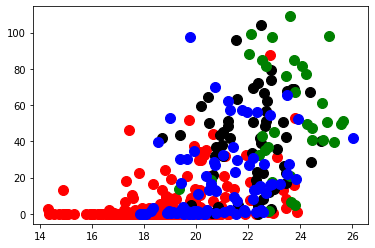

In [47]:
fig2 = plt.figure()

plt.scatter(df4.celsius[y_km4 ==0], df4.eduroam[y_km4 == 0], s=100, c='red')
plt.scatter(df4.celsius[y_km4 ==1], df4.eduroam[y_km4 == 1], s=100, c='black')
plt.scatter(df4.celsius[y_km4 ==2], df4.eduroam[y_km4 == 2], s=100, c='green')
plt.scatter(df4.celsius[y_km4 ==3], df4.eduroam[y_km4 == 3], s=100, c='blue')

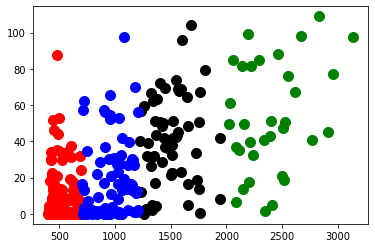

In [48]:
fig3 = plt.figure()

plt.scatter(df4.ppm[y_km4 ==0], df4.eduroam[y_km4 == 0], s=100, c='red')
plt.scatter(df4.ppm[y_km4 ==1], df4.eduroam[y_km4 == 1], s=100, c='black')
plt.scatter(df4.ppm[y_km4 ==2], df4.eduroam[y_km4 == 2], s=100, c='green')
plt.scatter(df4.ppm[y_km4 ==3], df4.eduroam[y_km4 == 3], s=100, c='blue')

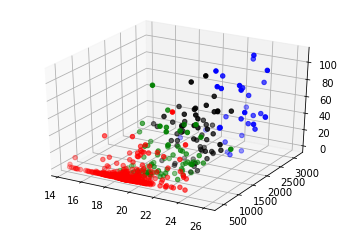

In [49]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(df4.celsius[y_km4 ==0], df4.ppm[y_km4 ==0], df4.eduroam[y_km4 ==0],c='red');
ax.scatter3D(df4.celsius[y_km4 ==1], df4.ppm[y_km4 ==1], df4.eduroam[y_km4 ==1],c='black');
ax.scatter3D(df4.celsius[y_km4 ==2], df4.ppm[y_km4 ==2], df4.eduroam[y_km4 ==2],c='blue');
ax.scatter3D(df4.celsius[y_km4 ==3], df4.ppm[y_km4 ==3], df4.eduroam[y_km4 ==3],c='green');
plt.show()

# The Elbow Method

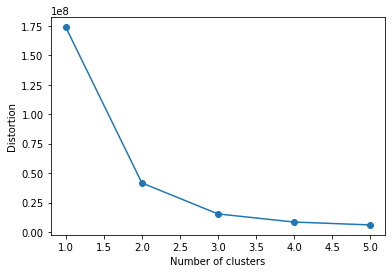

In [45]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 6):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df4)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 6), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()